__<span style="background-color:#ffffe0">第3章　時系列予測モデル構築・超入門</span>__

# 3.2　時系列データの特徴把握と前処理

## 3.3.1　1変量の時系列データに対する3つの特徴把握方法

* 時系列データの変動成分の分解
* 時系列データが定常かどうかの確認
* 自己相関の確認

### 準備（必要なモジュールとデータの読み込み）

In [1]:
#
# 必要なモジュールの読み込み
#

import pandas as pd
import numpy as np

from scipy import signal

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフスタイル
plt.rcParams['figure.figsize'] = [12, 9] #グラフサイズ
plt.rcParams['font.size'] = 14 #フォントサイズ

In [2]:
#
# 必要なデータセット（時系列データ）の読み込み
#

dataset='AirPassengers.csv'       #データセットのファイル名
df=pd.read_csv(
    dataset,
    index_col='Month', #変数「Month」をインデックスに設定
    parse_dates=True)  #インデックスを日付型に設定

print(df) #確認

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


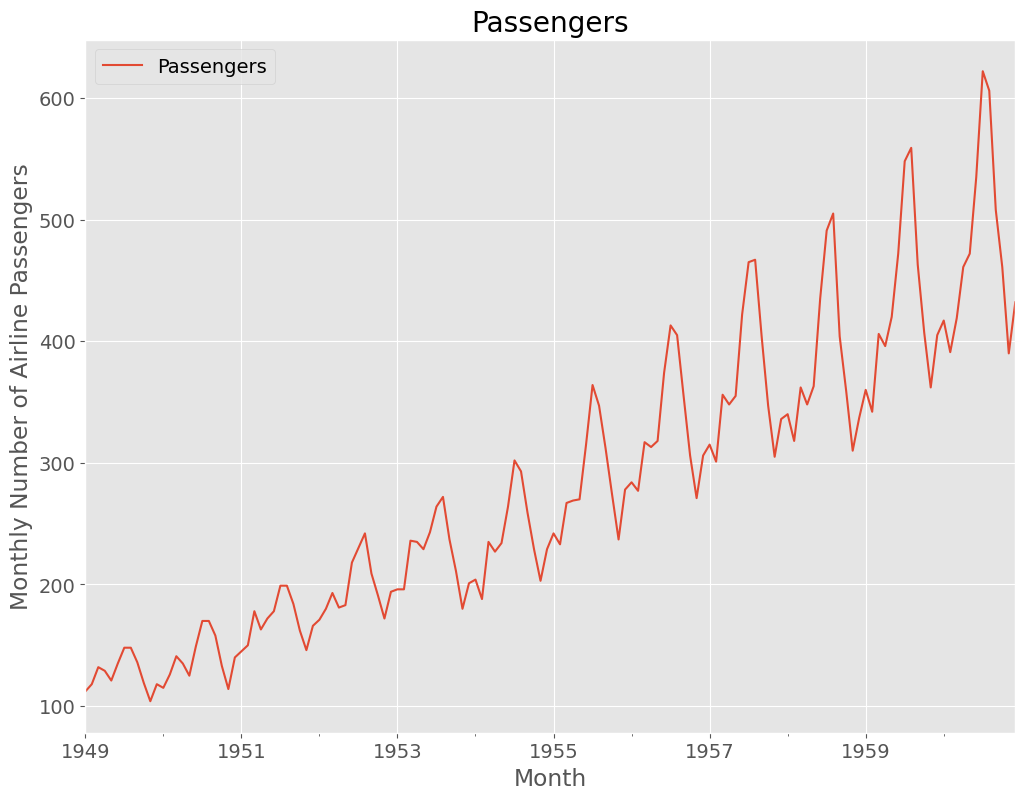

In [3]:
#
# 時系列データのグラフ化（折れ線グラフ）
#

df.plot()
plt.title('Passengers')                            #グラフタイトル
plt.ylabel('Monthly Number of Airline Passengers') #タテ軸のラベル
plt.xlabel('Month')                                #ヨコ軸のラベル
plt.show()

### 時系列データの変動成分の分解

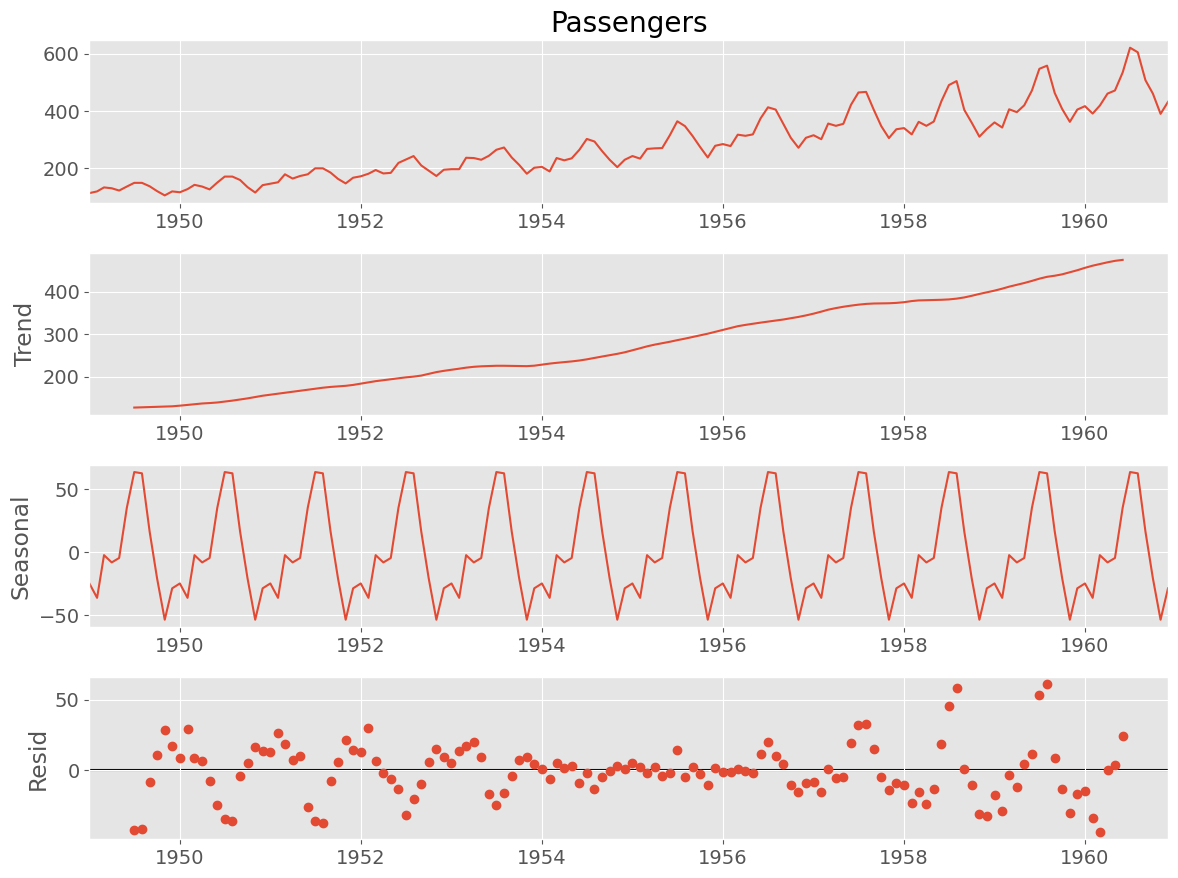

In [4]:
#
# 移動平均法を利用した分解（加法モデルを仮定）
#

# 成分分解
result=seasonal_decompose(
    df.Passengers,     
    model='additive',                       
    period=12)

# グラフ化
result.plot()
plt.show()

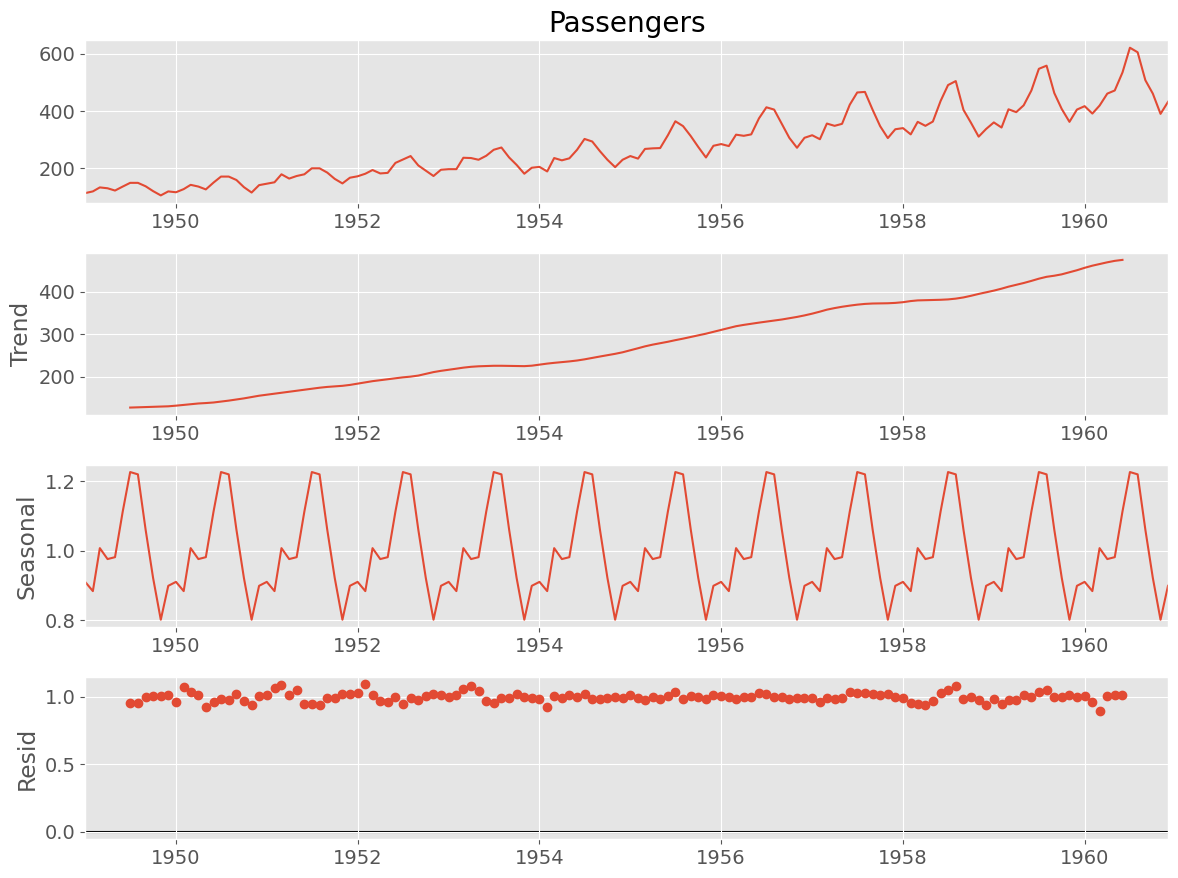

In [5]:
#
# 移動平均法を利用した分解（乗法モデルを仮定）
#

# 成分分解
result=seasonal_decompose(
    df.Passengers, 
    model='multiplicative', 
    period=12)

# グラフ化
result.plot()
plt.show()

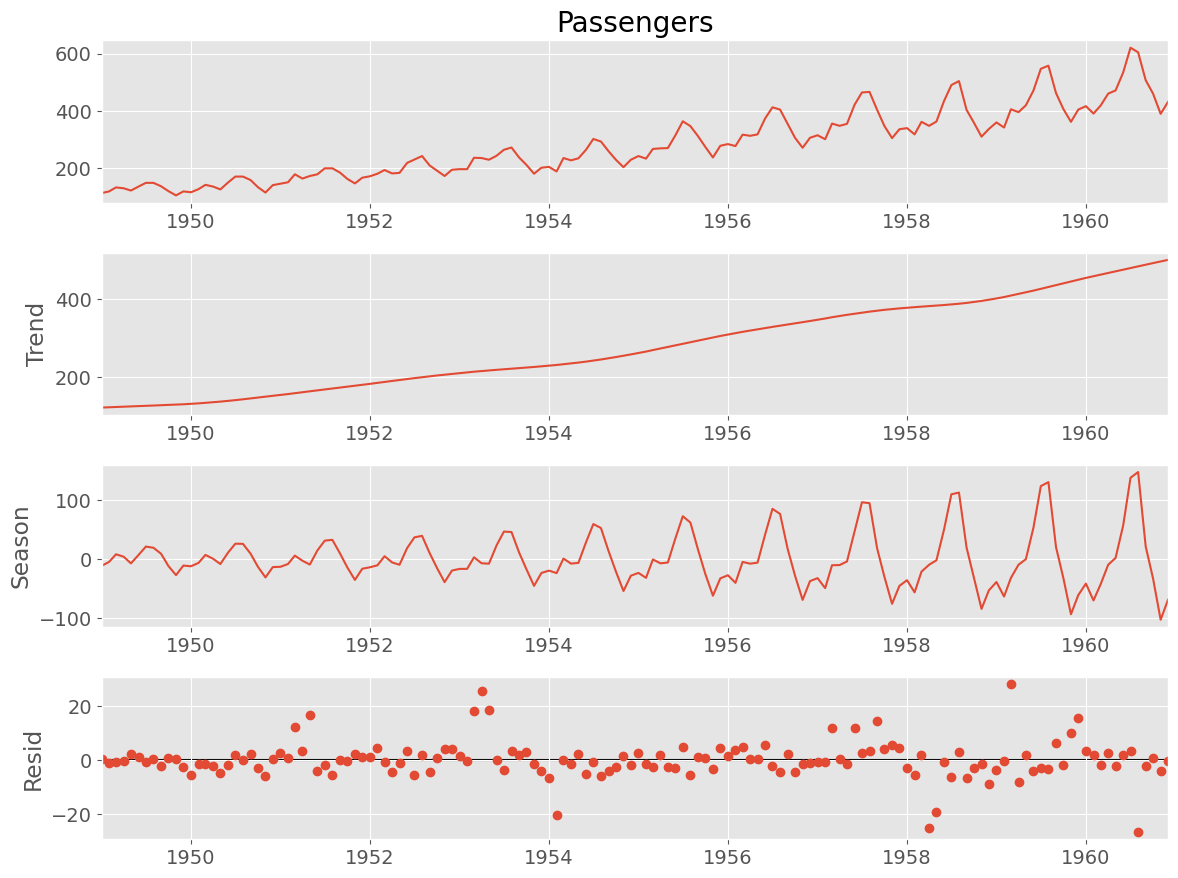

In [6]:
#
# STL分解（LOESS平滑化を利用した分解）
#

# 成分分解
stl=STL(
    df.Passengers,
    period=12,
    robust=True).fit()

# STL分解結果のグラフ化
stl.plot()
plt.show()

### 時系列データが定常かどうかの確認

In [7]:
#
# 原系列に対するADF検定
#

# ADF検定
dftest = adfuller(df.Passengers)

# 出力
print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])
print('Critical values:')
for i, j in dftest[4].items():
    print('\t', i, j)

ADF Statistic: 0.8153688792060512
p-value: 0.991880243437641
Critical values:
	 1% -3.4816817173418295
	 5% -2.8840418343195267
	 10% -2.578770059171598


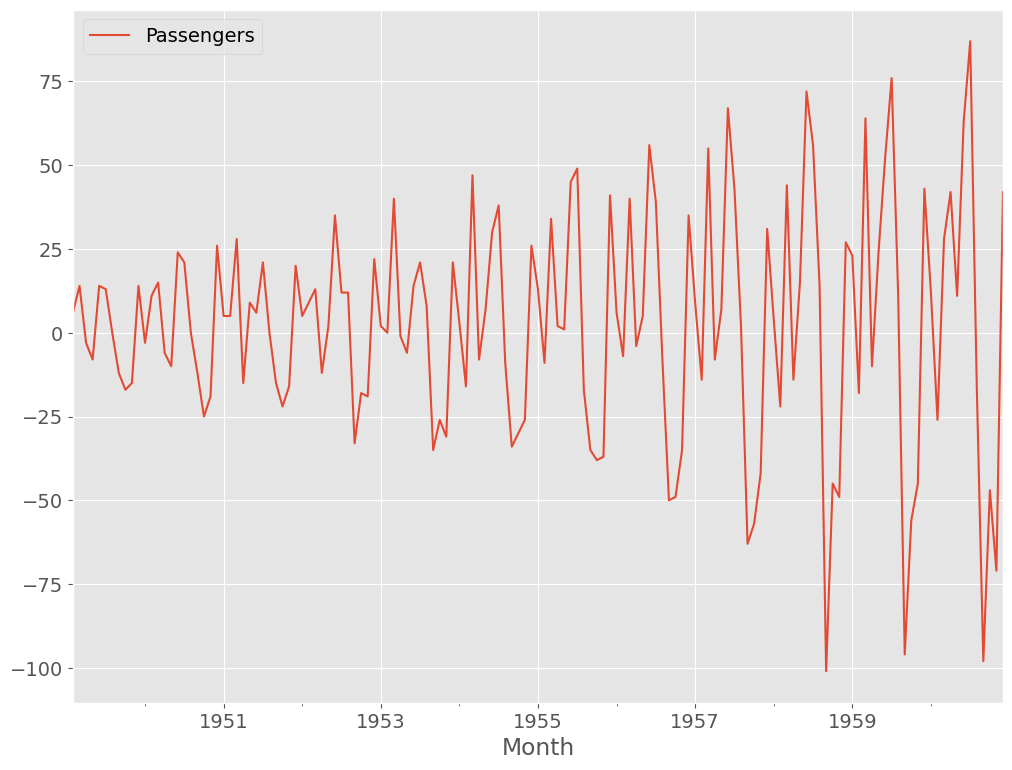

In [8]:
#
# 原系列の差分系列（1ヶ月）を生成
#

# 差分系列の生成
df_d1 = df.diff(1).dropna()

# グラフで確認
df_d1.plot()
plt.show()

In [9]:
#
# 原系列の差分系列（1ヶ月）に対するADF検定
#

# ADF検定
dftest = adfuller(df_d1.Passengers)

# 出力
print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])
print('Critical values:')
for i, j in dftest[4].items():
    print('\t', i, j)

ADF Statistic: -2.829266824169998
p-value: 0.054213290283825676
Critical values:
	 1% -3.4816817173418295
	 5% -2.8840418343195267
	 10% -2.578770059171598


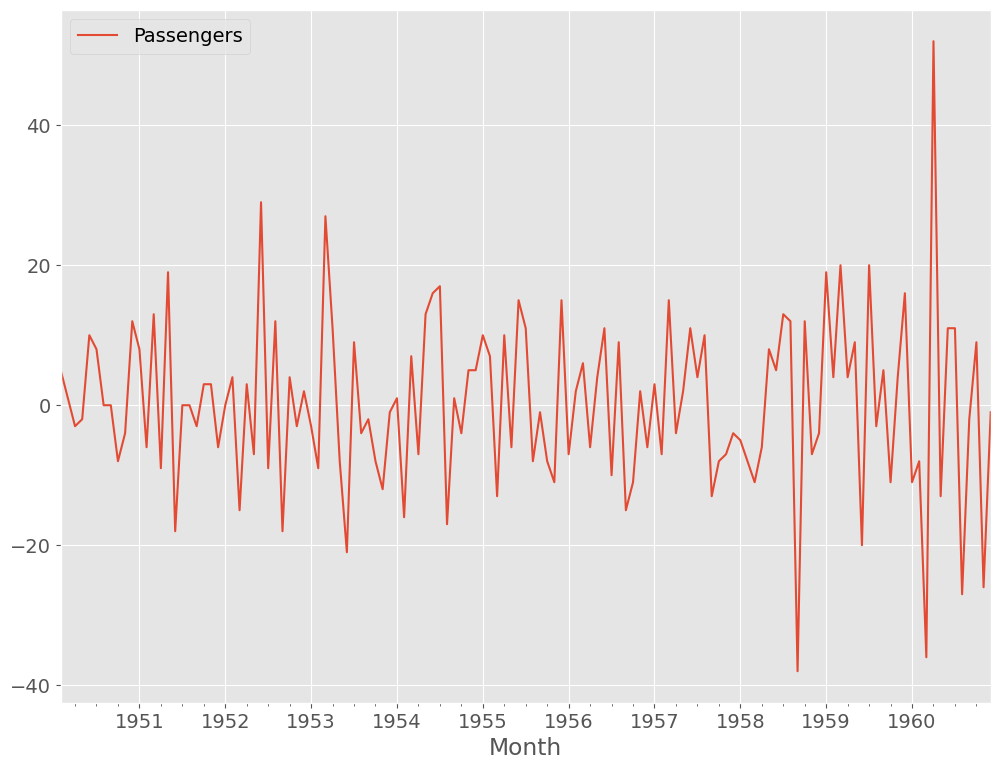

In [10]:
#
# 原系列の差分系列（1ヶ月）の差分系列（12ヶ月）の生成
#

# 差分系列の生成
df_d1_D12 = df_d1.diff(12).dropna()

# グラフで確認
df_d1_D12.plot()
plt.show()

In [11]:
#
# 原系列の差分系列（1ヶ月）の差分系列（12ヶ月）に対するADF検定
#

# ADF検定
dftest = adfuller(df_d1_D12.Passengers)

# 出力
print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])
print('Critical values:')
for i, j in dftest[4].items():
    print('\t', i, j)

ADF Statistic: -15.59561808374634
p-value: 1.856511600123444e-28
Critical values:
	 1% -3.4816817173418295
	 5% -2.8840418343195267
	 10% -2.578770059171598


### 自己相関の確認

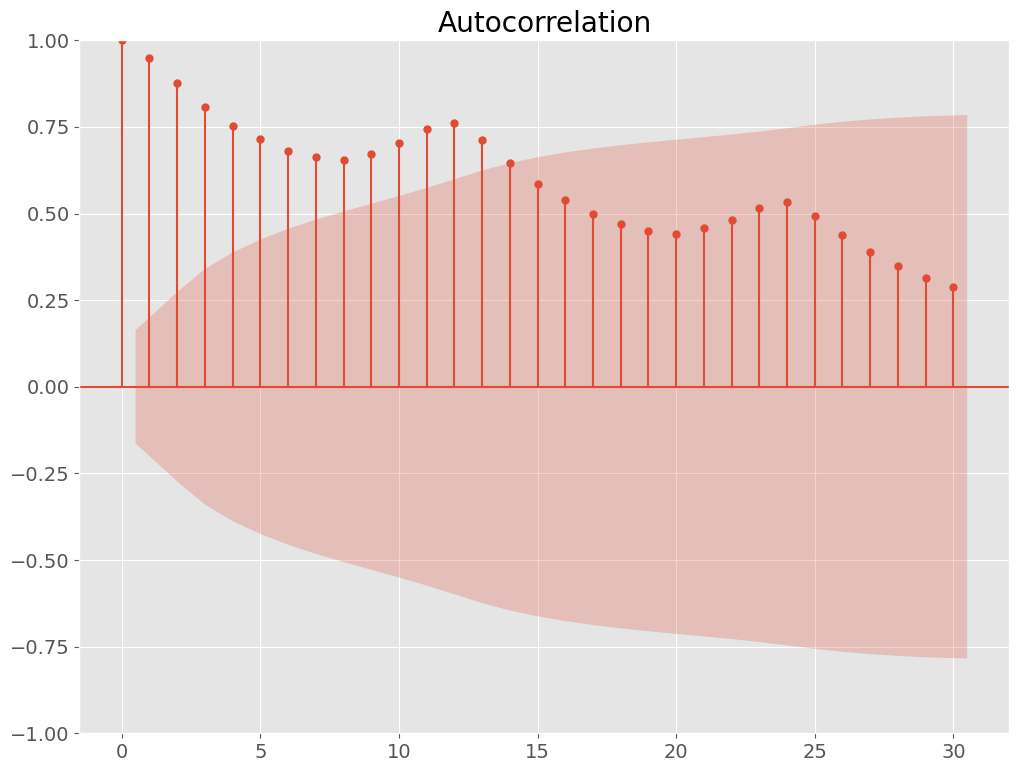

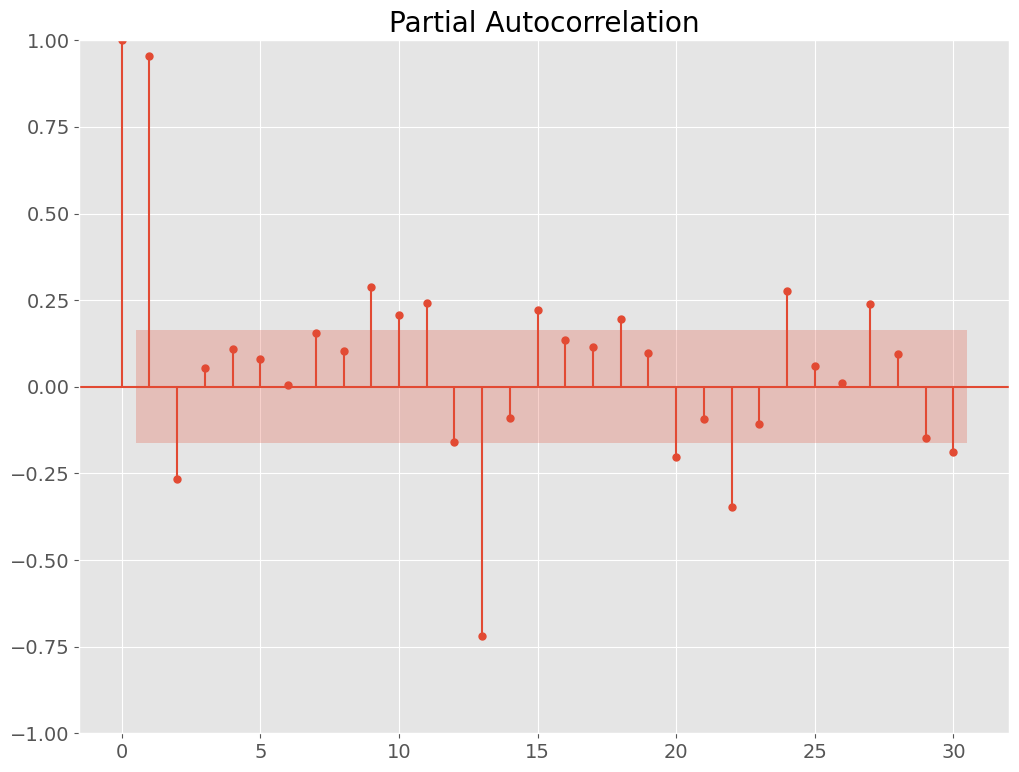

In [12]:
#
# 原系列の自己相関
#

acf = plot_acf(df.Passengers, lags=30)   #自己相関
pacf = plot_pacf(df.Passengers, lags=30) #偏自己相関

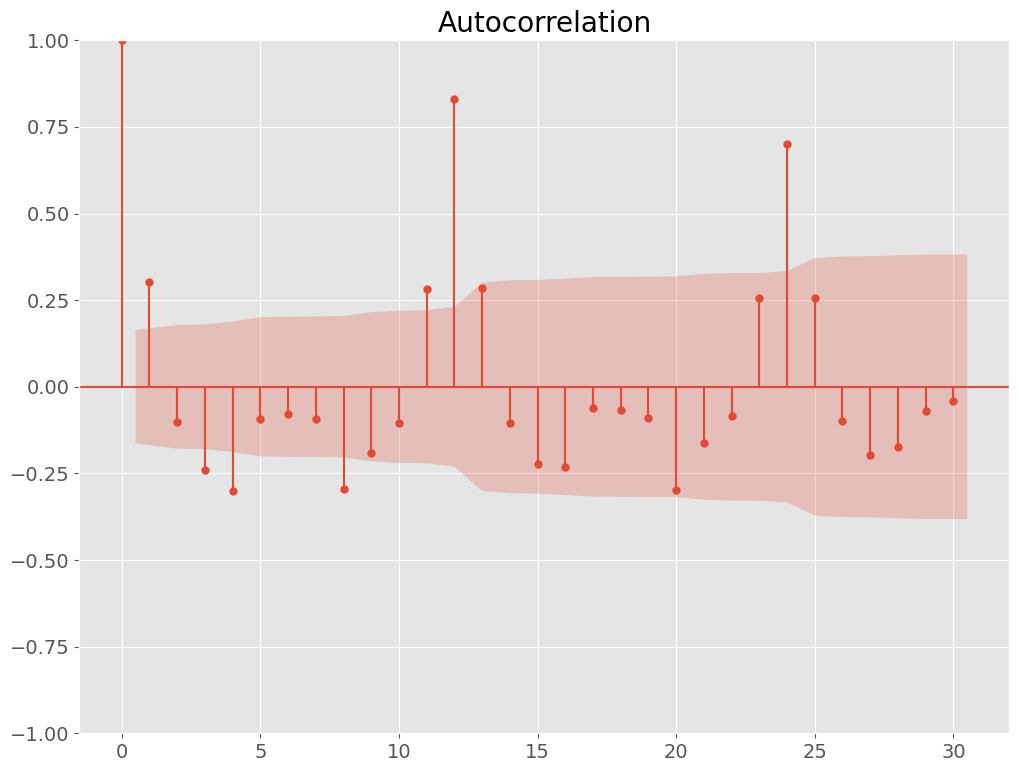

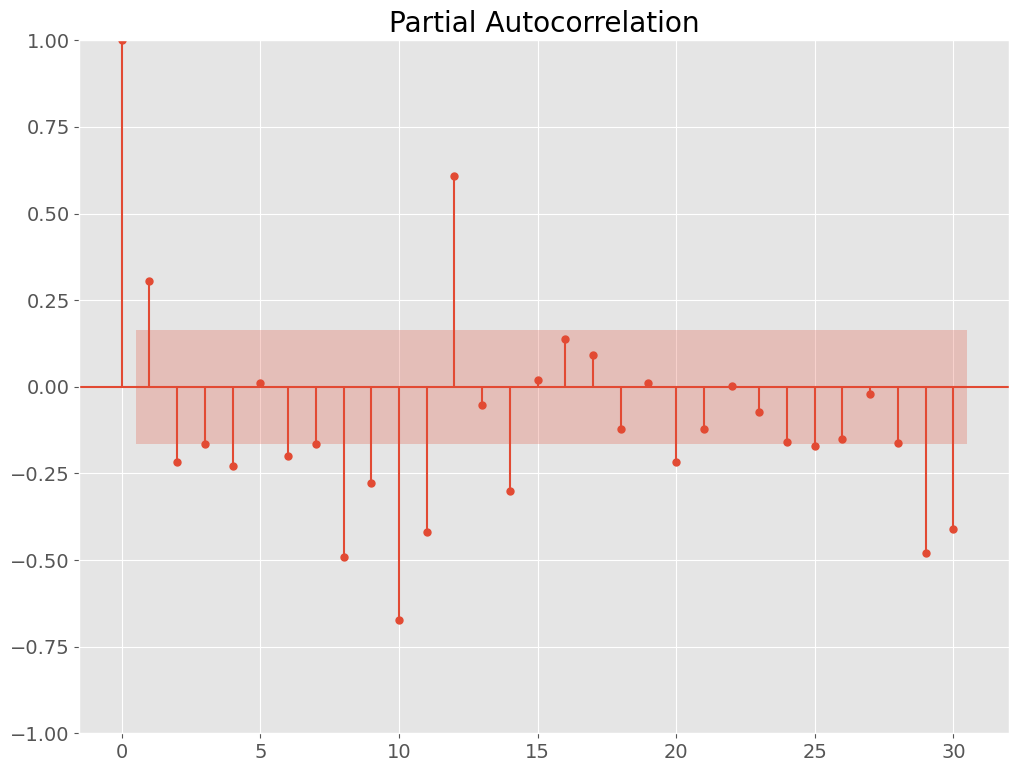

In [13]:
#
# 原系列の差分系列（1ヶ月前）の自己相関
#

acf = plot_acf(df_d1.Passengers, lags=30)   #自己相関
pacf = plot_pacf(df_d1.Passengers, lags=30) #偏自己相関

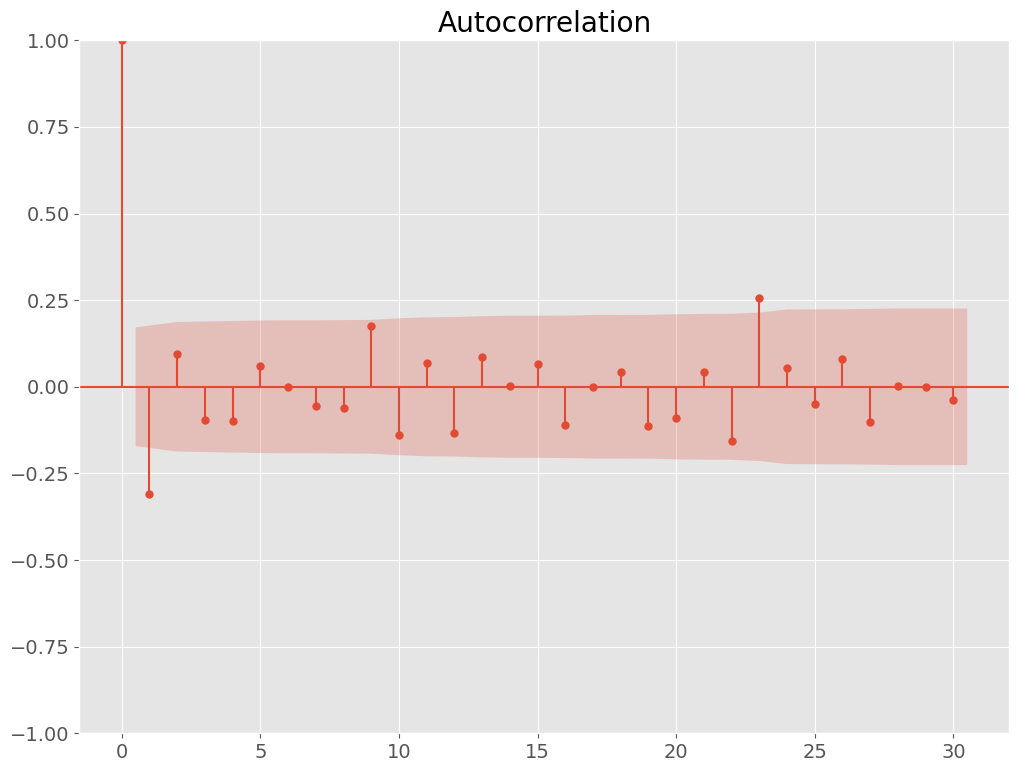

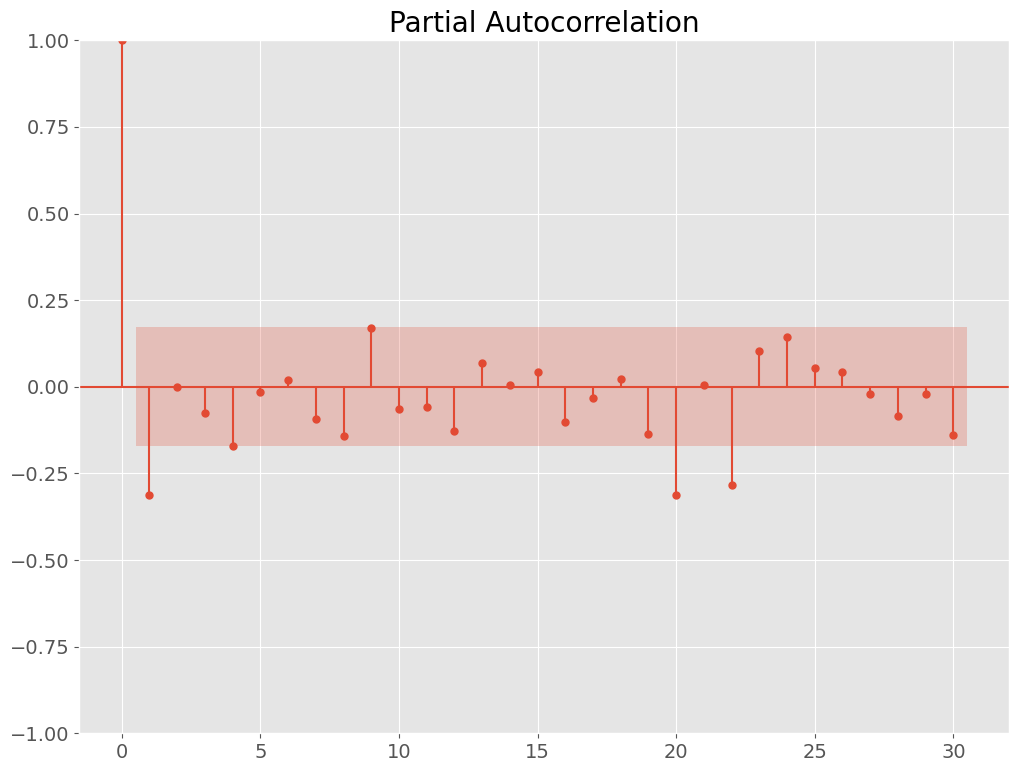

In [14]:
#
# 原系列の差分系列（1ヶ月前）の差分系列（12ヶ月）の自己相関
#

acf = plot_acf(df_d1_D12.Passengers, lags=30)   #自己相関
pacf = plot_pacf(df_d1_D12.Passengers, lags=30) #偏自己相関